**Object recognition** in videos involves detecting and tracking objects in a sequence of frames. There are two broad approaches to object recognition in videos: classic computer vision and deep learning.

* **Classic computer vision approaches** use algorithms such as OpenCV and template matching. This approach works well for simple objects and limited datasets but has limitations in handling complex objects and changing conditions.

* **Deep learning approaches** use convolutional neural networks (CNNs) to learn features from images and classify objects. This approach is better suited for complex objects and large datasets but requires large amounts of labeled data and can be computationally expensive.

### Notes: 
**`Please upload you're video to base dir`**

In [1]:
import os

path_base = "content"
video_path = os.path.join(path_base,"basquiat.mp4")

### Utilities

In [2]:

import shutil
import zipfile
import os
# Define a function to delete a folder

def delete_folder(folder_path):
    try:
        # Remove the folder and its contents
        shutil.rmtree(folder_path)
        # Print a message to confirm successful deletion
        print(f"Deleted folder: {folder_path}")
    except Exception as e:
        # Print an error message if the folder could not be deleted
        print(f"Error deleting folder: {e}")




def zip_folder(folder_path, output_path):
    """
    Creates a ZIP file containing all the files and subfolders in the specified folder.

    Args:
        folder_path (str): The path to the folder to be zipped.
        output_path (str): The path to the output ZIP file.
    """
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
        # Walk through all the files and subfolders in the specified folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Add the current file to the ZIP file
                file_path = os.path.join(root, file)
                zip_file.write(file_path, os.path.relpath(file_path, folder_path))


## classic approach 

In [1]:
################################
############# Imports ##################
################################
import cv2
from PIL import Image
from skimage import io
import numpy as np
from matplotlib import pyplot as plt


### in simple image
to test this code upload an image and an image of an object extracted (template) from this image.

In [ ]:
# Define path and load video
image_template_name= "fullasake.png"
image_example = "partasake.png"

# Load test image, convert to grayscale, and load template image
img_rgb = cv2.imread(os.path.join(path_base, image_example))
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(os.path.join(path_base,image_template_name), 0)

# Apply template matching to find matching areas in the image
h, w = template.shape[::]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Visualize the result using a heatmap
plt.imshow(res, cmap='gray')

# Define a threshold to determine which matches to keep
threshold = 0.8
loc = np.where(res >= threshold)

# Draw rectangles around the matching areas in the original image
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display the result
cv2.imshow("Matched image", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

### In video

To perform object detection using template matching on a video, you need to initialize a video capture object and set the template image for detection. Then, loop through each frame of the video, convert it to grayscale, and perform template matching. If the correlation coefficient of the detected object exceeds the threshold value, draw a bounding box around the object and display the frame with the bounding box.
* we will use **Template matching** wish is a technique in computer vision that involves finding a small image patch, known as a template, within a larger image or video frame. the goal of template matching is to locate occurrences of the template within the image or video frame by searching for regions that are highly similar to the template. 

* To test this code upload a video and an image of an object within the video (template : for 'weed.jpg')

exemple of template image: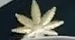

In [ ]:
# This code reads a video file and performs template matching to detect a specific object in each frame of the video.
# the detected frame is extracted from the video and stored in folder named 'simple_approach'
# Import OpenCV library
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

image_template_name= "partasake.png"

# Initialize video capture object
video = cv2.VideoCapture('content/basquiat.mp4')

# Get video properties
fps = int(video.get(cv2.CAP_PROP_FPS))
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

# Set template for object detection
template = cv2.imread(os.path.join(path_base,image_template_name), 0)
h, w = template.shape[::]

current_time = 0
threshold = 0.85

if not os.path.exists(os.path.join(path_base,"simple_approach")):
    os.makedirs(os.path.join(path_base,"simple_approach"))

# Loop through video frames
for i in range(frame_count):
    # Get current frame
    ret, frame = video.read()
    if not ret:
        break
        # Convert frame to grayscale
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform template matching using correlation coefficient normalized method
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)

    # Draw bounding box around detected object and display the frame
    if np.shape(loc)[1] > 0:
        print("timestep", current_time, "frame", i)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
        cv2.imwrite(os.path.join(path_base,"simple_approach",f"image_{current_time}.jpg"), frame)


    # Update current time
    current_time += 1 / fps
# Release video capture object
video.release()

## DL approach (My approach ) 

In [ ]:
# # Install required Python packages and their dependencies
%pip install cython pillow>=7.0.0 numpy>=1.18.1 opencv-python>=4.1.2 torch>=1.9.0 --extra-index-url https://download.pytorch.org/whl/cu102 torchvision>=0.10.0 --extra-index-url https://download.pytorch.org/whl/cu102 pytest==7.1.3 tqdm==4.64.1 scipy>=1.7.3 matplotlib>=3.4.3 mock==4.0.3
# Install pycocotools package from Github
%pip install pycocotools@git+https://github.com/gautamchitnis/cocoapi.git@cocodataset-master#subdirectory=PythonAPI
# Upgrade imageai package
%pip install imageai --upgrade

**ImageAI** is a python library built to empower developers, reseachers and students to build applications and systems with self-contained Deep Learning and Computer Vision capabilities.


In [6]:
path_base = "/content"
video_path = path_base+"/basquiat.mp4"

# Specify the name of the dataset (specify a folder where u want to store your dataset )
dataset_name = "my_dataset"
video_path

'/content/basquiat.mp4'

### create the data set

In [ ]:
# Import necessary libraries
import os
import requests
from bs4 import BeautifulSoup
import time

def scrape_images(search_term, save_dir):
    """
    This function performs web scraping to download images from Google Images search results for a given search term.
    It takes two arguments, the search term, and the directory to save the downloaded images.
    """

    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Scrape Google Images for search term
    url = f"https://www.google.com/search?q={search_term}&tbm=isch"
    count = 0
    num_images = 10

    # Loop until the specified number of images have been downloaded
    while count < 1000:

        try:
            # Send GET request to URL and get the response
            response = requests.get(url)

            # Use BeautifulSoup library to parse the HTML content
            soup = BeautifulSoup(response.content, "html.parser")

            # Find all image tags in the HTML content
            images = soup.find_all("img")

            # Download images
            for image in images:
                try:
                    # Get image source URL
                    image_url = image["src"]

                    # Download image using its URL
                    response = requests.get(image_url)

                    # Check if the download was successful
                    if response.status_code == 200:
                        # Save image to disk
                        with open(os.path.join(save_dir, f"{search_term}_{count}.jpg"), "wb") as f:
                            f.write(response.content)

                        # Increment the count of downloaded images
                        count += 1

                        # Check if the desired number of images have been downloaded
                        if count >= num_images:
                            break
                except:
                    # If an error occurs while downloading an image, skip to the next image
                    pass

            # Find the URL for the next page of search results
            next_links = soup.find_all("a", class_="pn")
            if len(next_links) < 2:
                # If there are no more pages, break out of the loop
                break

            # Construct the URL for the next page of search results
            next_link = next_links[1]["href"]
            url = f"https://www.google.com{next_link}"

            # Pause for a few seconds between requests to avoid being blocked by the website
            time.sleep(1)

        except Exception as e:
            # If an error occurs while downloading images, print the error and wait for a few seconds before trying again
            print(f"Error: {e}")
            time.sleep(5)
            continue

    # Print the number of downloaded images
    print(f"Finished downloading {count} images for {search_term}")


In [ ]:

# Define a dictionary where the keys are objects and the values are lists of keywords associated with each object
key_words_for_each_object = {"weed":["weed","cannabis plant logo","weed sign","weed log shirt","weed symbol","weed icon","weed log hat","marijuana symbol","weed log jwery","weed image","weed leaf icon","weed img","weed illustartion"]
                             # you can add more objects here: for exemple: 
                                                        #  "knife":['knife','knife log',"knife clipart","knife kitchen","man with knife"]
                             }

# Loop through each object in the dictionary
for object_ in key_words_for_each_object.keys():
    
    # Create a directory name for the object
    dir_name= f"{object_}_images"
    
    # Loop through each keyword associated with the object
    for key in key_words_for_each_object[object_]:
        
        # Call the scrape_images function with the keyword and directory name
        scrape_images(key, dir_name)
        
        # Pause for 4 seconds to avoid being blocked by the website
        time.sleep(4)



**Note:**

> **If you could add some images of the objects by extracting them from the video, and adding them to the the dataset, it will help the model to recognisze very well the frame that conataines those objects**








### clean the datasets

In [ ]:
import os
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

def display_and_delete_images(folder_path,start_indx,end_indx):
    """
    Display a batch of images in a folder and allow the user to select and delete unwanted images
    
    :param folder_path: the path to the folder containing the images
    """
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Display the images and allow the user to delete them
    for image_file in image_files[start_indx:end_indx]:
        # Load the image and create an Image widget
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)  # Load the image using PIL
        image.thumbnail((150, 150))  # Resize the image
        image_widget = widgets.Image(value=image._repr_png_(), format='png', width=150, height=150)  # Create an Image widget for displaying the image
        
        # Create a Button widget for deleting the image
        button = widgets.Button(description='Delete')
        
        # Define the button click handler
        def on_button_click(button, image_path):
            os.remove(image_path)  # Remove the image from the folder
            image_widget.close()  # Close the Image widget
            button.close()  # Close the Button widget
            
        # Attach the button click handler to the button
        button.on_click(lambda x, image_path=image_path: on_button_click(x, image_path))

        # Display the image and button widgets
        display(widgets.HBox([image_widget, button]))


In [ ]:
# Specify the names of the folders containing the images for each class
class_folders = [f"{k}_images" for k in key_words_for_each_object.keys()]
for f in class_folders:
    f_path =os.path.join(path_base,f)
    print(f"nomber of images in the folder {f_path} is :",len([f for f in os.listdir(f_path) if f.endswith('.jpg') or f.endswith('.png')]))


In [ ]:
# please wait untill the code stops runing (ploting the images)
# delete the unwanted or dupliacted images : please take your time to do it

# you can modify this variables to move to next  batch  (nbr_image_t_show) of images
start = 0
nbr_image_t_show  = 50
end = start+nbr_image_t_show

display_and_delete_images(os.path.join(path_base,"weed_images") ,start,end)

In [ ]:
# run this untill it shows nothing ===> this means you have processed all the images
start = end
nbr_image_t_show  = 100
end = start+nbr_image_t_show
path_tmp = os.path.join(path_base,"weed_images")

print(f"{start}/{len([f for f in os.listdir(path_tmp) if f.endswith('.jpg') or f.endswith('.png')])} images treated ")

display_and_delete_images( path_tmp,start,end)
print(f"{end}/{len([f for f in os.listdir(path_tmp) if f.endswith('.jpg') or f.endswith('.png')])} images treated ")


### prepare the dataset folder in the right structure

In [ ]:
import os,random
import shutil

"""
This code creates a train-test split of image files in a specified dataset folder by iterating over each class folder 
and creating a copy of each image file in both the train and test folders based on the specified test fraction.
 The train and test folders are created if they do not already exist.
"""

# Create the dataset folder
if not os.path.exists(dataset_name):
    os.makedirs(dataset_name)


# Create the train and test folders
if not os.path.exists(os.path.join(dataset_name, "train")):
    os.makedirs(os.path.join(dataset_name, "train"))
if not os.path.exists(os.path.join(dataset_name, "test")):
    os.makedirs(os.path.join(dataset_name, "test"))

# Specify the fraction of images to use for testing
test_fraction = 0.2

# Iterate over each class folder
for class_folder in class_folders:

    # Create the class folder in the train and test folders
    class_name = os.path.basename(class_folder)
    
    if not os.path.exists(os.path.join(dataset_name, "train", class_name)):
        os.makedirs(os.path.join(dataset_name, "train", class_name))
        
    if not os.path.exists(os.path.join(dataset_name, "test", class_name)):
        os.makedirs(os.path.join(dataset_name, "test", class_name))


    # Get a list of all the image files in the class folder
    image_files = [f for f in os.listdir(class_folder) if f.endswith(".jpg") or f.endswith(".png")]

    # Shuffle the image files
    random.shuffle(image_files)

    # Split the image files into train and test sets
    num_test = int(len(image_files) * test_fraction)
    train_files = image_files[num_test:]
    test_files = image_files[:num_test]

    # Copy the train files to the train class folder
    for train_file in train_files:
        src_file = os.path.join(class_folder, train_file)
        dst_file = os.path.join(dataset_name, "train", class_name, train_file)
        shutil.copyfile(src_file, dst_file)

    # Copy the test files to the test class folder
    for test_file in test_files:
        src_file = os.path.join(class_folder, test_file)
        dst_file = os.path.join(dataset_name, "test", class_name, test_file)
        shutil.copyfile(src_file, dst_file)
print("done !!")

### train the model

In [ ]:
# Import the ClassificationModelTrainer class from the Custom module of the ImageAI library
from imageai.Classification.Custom import ClassificationModelTrainer

# Create an instance of the ClassificationModelTrainer class
model_trainer = ClassificationModelTrainer()

# Set the model type to ResNet50
model_trainer.setModelTypeAsResNet50()

# Set the data directory for the dataset
model_trainer.setDataDirectory(dataset_name)

# Train the model with 100 epochs and a batch size of 32
model_trainer.trainModel(num_experiments=100, batch_size=32)

**Note:** `If you trained the model on only one object, it will always show an accuracy of 1.0000. This is not an issue, so there is no need to worry. Just continue with the training.`

### start the predictions

In [ ]:
def find_json_and_pt_files(folder_name):
    """Find .json and .pt files in a folder and return their absolute paths."""
    json_file = None
    pt_file = None
    
    # Iterate over files in the folder
    for file_name in os.listdir(folder_name):
        # Check if file ends with .json
        if file_name.endswith(".json"):
            json_file = os.path.abspath(os.path.join(folder_name, file_name))
        # Check if file ends with .pt
        elif file_name.endswith(".pt"):
            pt_file = os.path.abspath(os.path.join(folder_name, file_name))
    
    return json_file, pt_file


In [ ]:
json_file, pt_file = find_json_and_pt_files(os.path.join(path_base,dataset_name,"models"))
print(json_file,"==", pt_file )

In [ ]:
# Import the CustomImageClassification class from the imageai.Classification module.
# This class will be used to create a custom image classification model.
from imageai.Classification.Custom import CustomImageClassification

# Get the current working directory.
execution_path = os.getcwd()

# Create a new instance of the CustomImageClassification class.
model = CustomImageClassification()

# Set the model type to ResNet50.
model.setModelTypeAsResNet50()

# Set the path to the pre-trained model file.
# The pt_file variable is expected to be defined elsewhere in the code.
model.setModelPath(os.path.join(execution_path, pt_file))

# Set the path to the JSON file containing the model's labels.
# The json_file variable is expected to be defined elsewhere in the code.
model.setJsonPath(os.path.join(execution_path, json_file))

# Load the pre-trained model and its labels from the specified files.
model.loadModel()


#### reading the video and predict

In [ ]:
class_folders

In [ ]:
import cv2
import numpy as np,pandas as pd


def process_video(video_path, classifier_model, class_folders, threshold=80,verbose=True):
    # Get video properties
    if os.path.isfile(video_path):
        print(f"The video file '{video_path}' exists.")
    else:
        raise FileNotFoundError(f"The video file '{video_path}' does not exist.")

    video = cv2.VideoCapture(video_path)
    fps = int(video.get(cv2.CAP_PROP_FPS))
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps

    # Loop through video frames
    current_time = 0
    prev_frame = None
    consecutive_duplicate_frames = 0
    max_consecutive_duplicate_frames = fps // 4  # skip frames if more than 0.25 seconds of consecutive duplicates
    processed_time = 0

    # Create output folder for each class
    for class_folder in class_folders:
        if not os.path.exists(f"extracted_{class_folder}"):
            os.makedirs(f"extracted_{class_folder}")
    # Initialize lists to store data for each saved frame
    saved_frames_paths = []
    saved_frames_classes = []
    saved_frames_timestamps = []


    while True:
        # Get current frame
        ret, frame = video.read()
        if not ret:
            break

        # Skip frame if too many consecutive duplicates
        if prev_frame is not None and np.array_equal(frame, prev_frame):
            consecutive_duplicate_frames += 1
            if consecutive_duplicate_frames > max_consecutive_duplicate_frames:
                consecutive_duplicate_frames = 0
                continue
        else:
            consecutive_duplicate_frames = 0

        # Process frame if it's been at least 1 second since last processed frame
        if current_time - processed_time >= 1:
            predictions, probabilities = classifier_model.classifyImage(frame, result_count=len(class_folders))

            for eachPrediction, eachProbability in zip(predictions, probabilities):
                if eachProbability >= threshold:
                    # Convert current time to mm:ss:ms format
                    mm, ss = divmod(int(current_time), 60)
                    ms = int((current_time - int(current_time)) * 1000)
                    time_str = f"{mm:02d}:{ss:02d}:{ms:03d}"

                    # Save frame as image in folder with same object name
                                
                    folder_path = os.path.join(os.getcwd(), f"extracted_{eachPrediction}")
                    file_name = f"{eachPrediction}_{time_str}.jpg"
                    file_path = os.path.join(folder_path, file_name)
                    
                    # print(f"sotred in {file_path}")
                    cv2.imwrite(file_path, frame)

                    # Store path, class, and timestamp for the saved frame in lists
                    saved_frames_paths.append(file_path)
                    saved_frames_classes.append(eachPrediction)
                    saved_frames_timestamps.append(time_str)
                    if verbose:
                        print("time: ", time_str, "\t prediction: ", eachPrediction, " prob:  ", eachProbability)

            processed_time = current_time

        # Update current time and previous frame
        current_time += 1 / fps
        prev_frame = frame.copy()

    # Release video capture object
    video.release()
    cv2.destroyAllWindows()

    # Create a dataframe from the saved data
    data = {'path': saved_frames_paths, 'class': saved_frames_classes, 'timestamp': saved_frames_timestamps}
    df = pd.DataFrame(data=data)

    # Return the dataframe
    return df

In [ ]:
from torch import threshold

# delete the generated folders if exist
for d in class_folders:
    try:
        delete_folder(os.path.join(os.getcwd(),f"extracted_{d}"))
    except:
        pass


# prepare the parametres
video_path = os.path.join(path_base,"video.mp4")

args = {
    "video_path" :video_path,
    "classifier_model": model,
    "class_folders"   :  class_folders,
    "threshold"       :85,
    "verbose"       :True
}


# process video

extracted_frames_info =  process_video(**args)

In [ ]:
extracted_frames_info.head(10)

**Export as Excel file**


In [ ]:
# create a Pandas Excel writer using xlsxwriter as the engine
writer = pd.ExcelWriter('extracted_frames.xlsx')

# convert extracted_frames_info to an Excel object and write to the writer
extracted_frames_info.to_excel(writer, sheet_name='Sheet1')

# save the writer and close the file
writer.save()

**To ensure optimal model performance, it is important to devote sufficient time and resources to collecting and cleaning high-quality training data, as the accuracy of the model depends strongly on the quality of the training data.**

Hop you like it & Enjoy 😃